<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr

     |████████████████████████████████| 948 kB 8.3 MB/s 
     |████████████████████████████████| 280 kB 47.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpzs5bgdp_/dl
100%|██████████| 152M/152M [00:01<00:00, 125MB/s]


In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 19.5MB/s]


In [ ]:
! ls sample | shuf |head -n 5

deskewed-2019_09_16_nguyen_thi_hoai_thanh_2019091614580813_18.jpg
6613.jpg
30036.jpg
458_Unmodified_82895.jpg
13221_16.jpg.jpg


'VŨ THUỲ NINH'

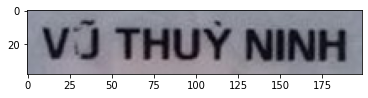

In [ ]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
100% 61.2M/61.2M [00:00<00:00, 154MB/s]


In [ ]:
! unzip -qq -o ./data_line.zip

In [ ]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 4839, done.
remote: Total 4839 (delta 0), reused 0 (delta 0), pack-reused 4839
Receiving objects: 100% (4839/4839), 462.77 MiB | 34.96 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Checking out files: 100% (4793/4793), done.


In [ ]:
import json
root = "/content/Vietnamese-HTR/data/Data 1: Handwriting OCR for Vietnamese Address/"

def create_vietocr_annote(root, img_dir_name, output_name):
    #read the file
    with open(root + img_dir_name + "/labels.json") as file:
        labels = json.load(file)
    data = []
    for img_name in labels:
        data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")
    print(data)


    #write back the file
    with open(root + output_name,"w") as f:
        f.writelines(data)
create_vietocr_annote(root, "0916_Data Samples 2", "train_annotation.txt")
create_vietocr_annote(root, "1015_Private Test", "test_annotation.txt")

['0916_Data Samples 2/0000_samples.png\tSố 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương\n', '0916_Data Samples 2/0001_samples.png\tSố 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh\n', '0916_Data Samples 2/0002_samples.png\tSố 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương\n', '0916_Data Samples 2/0003_samples.png\t42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh\n', '0916_Data Samples 2/0004_samples.png\t200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế\n', '0916_Data Samples 2/0005_samples.png\t27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh\n', '0916_Data Samples 2/0006_samples.png\tSố 113 Đường Hưng Thái 2, Phường Tân Phong, Quận 7, TP Hồ Chí Minh\n', '0916_Data Samples 2/0007_samples.png\tThôn 4, xã Giới Phiên, Thành phố Yên Bái, Yên Bái\n', '0916_Data Samples 2/0008_samples.png\tDãy II, B1, Trần Phú, Phường Cái Khế, Quận Ninh Kiều, Cần Thơ\n', '0916_Data Samples 2/0009_samples.png\tấp Hòa Lon

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR/data/Data 1: Handwriting OCR for Vietnamese Address/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':10000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['dataloader'].update(dataloader_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': '/content/Vietnamese-HTR/data/Data 1: Handwriting OCR for Vietnamese Address/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './weights/trans

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpj8qeo49c/dl
100%|██████████| 152M/152M [00:00<00:00, 227MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|█████████████████████████████████████████| 1823/1823 [00:11<00:00, 165.30it/s]


Created dataset with 1822 samples


Create valid_hw: 100%|███████████████████████████████████████████| 549/549 [00:02<00:00, 239.12it/s]


Created dataset with 548 samples


valid_hw build cluster: 100%|██████████████████████████████████| 548/548 [00:00<00:00, 34578.15it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

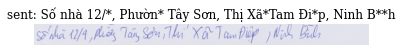

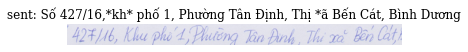

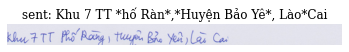

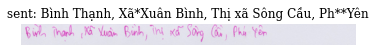

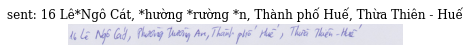

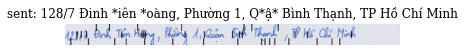

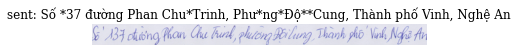

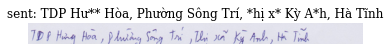

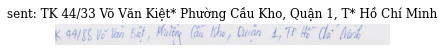

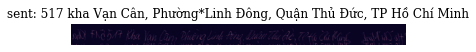

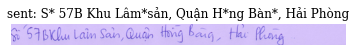

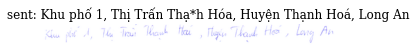

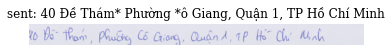

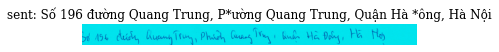

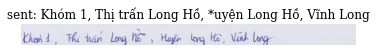

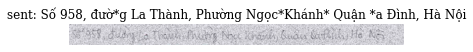

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.180 - lr: 3.96e-05 - load time: 11.42 - gpu time: 249.40
iter: 000400 - train loss: 0.927 - lr: 1.12e-04 - load time: 9.29 - gpu time: 248.48
iter: 000600 - train loss: 0.841 - lr: 2.01e-04 - load time: 6.15 - gpu time: 248.39
iter: 000800 - train loss: 0.807 - lr: 2.73e-04 - load time: 8.59 - gpu time: 248.32
iter: 001000 - train loss: 0.789 - lr: 3.00e-04 - load time: 7.39 - gpu time: 248.70
iter: 001200 - train loss: 0.777 - lr: 3.00e-04 - load time: 10.52 - gpu time: 248.82
iter: 001400 - train loss: 0.768 - lr: 2.99e-04 - load time: 7.11 - gpu time: 248.37
iter: 001600 - train loss: 0.763 - lr: 2.97e-04 - load time: 11.14 - gpu time: 250.15
iter: 001800 - train loss: 0.757 - lr: 2.94e-04 - load time: 9.48 - gpu time: 249.09
iter: 002000 - train loss: 0.756 - lr: 2.91e-04 - load time: 6.72 - gpu time: 259.79
iter: 002200 - train loss: 0.752 - lr: 2.87e-04 - load time: 9.51 - gpu time: 260.19
iter: 002400 - train loss: 0.747 - lr: 2.82e-04 - load time: 6

Visualize prediction from our trained model


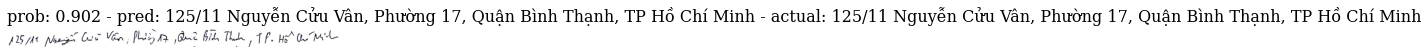

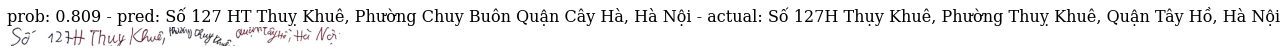

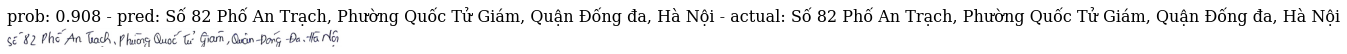

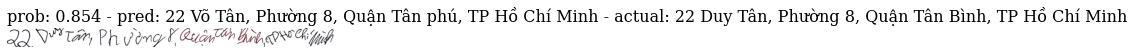

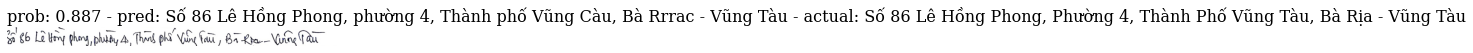

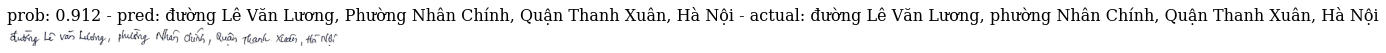

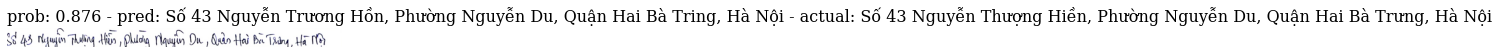

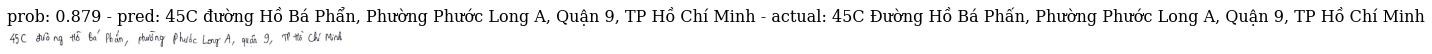

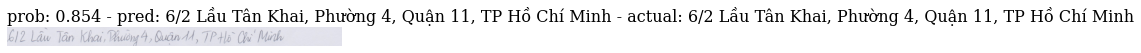

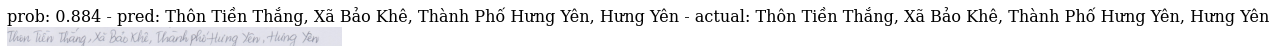

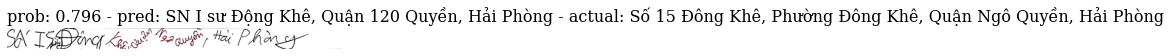

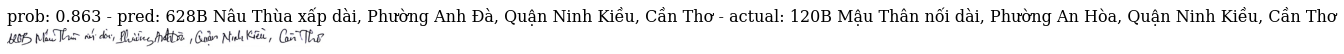

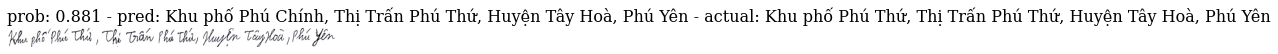

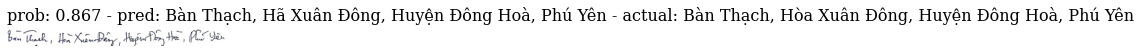

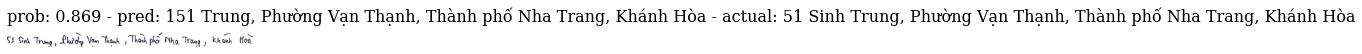

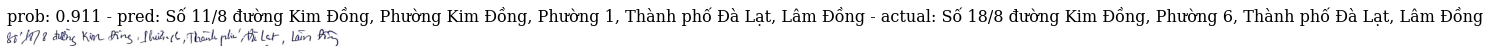

In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.2647058823529412, 0.74901867)